In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

In [2]:
activity=pd.read_csv(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\raw\Wearables_dataset\activity_environment_data.csv")

In [3]:
activity2=pd.read_excel(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\raw\Wearables_dataset\activity_environment_data.xlsx")

In [4]:
digital=pd.read_csv(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\raw\Wearables_dataset\digital_interaction_data.csv")

In [5]:
personal=pd.read_csv(r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\datasets\raw\Wearables_dataset\personal_health_data.csv")

In [6]:
activity.columns

Index(['User_ID', 'Timestamp', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Type', 'Exercise_Duration', 'Exercise_Intensity',
       'Ambient_Temperature', 'Battery_Level', 'Altitude', 'UV_Exposure'],
      dtype='object')

In [7]:
activity2.columns

Index(['User_ID', 'Timestamp', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Type', 'Exercise_Duration', 'Exercise_Intensity',
       'Ambient_Temperature', 'Battery_Level', 'Altitude', 'UV_Exposure',
       'runningSpeed', 'basalEnergyBurned', 'respiratoryRate'],
      dtype='object')

In [8]:
digital.columns

Index(['User_ID', 'Timestamp', 'Notifications_Received', 'Screen_Time'], dtype='object')

In [9]:
personal.columns

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Calories_Intake', 'Water_Intake',
       'Stress_Level', 'Mood', 'Skin_Temperature', 'Body_Fat_Percentage',
       'Muscle_Mass', 'Health_Score', 'Anomaly_Flag'],
      dtype='object')

In [12]:
df1=activity[['User_ID','Timestamp','Steps','Calories_Burned']]
df1

,User_ID,Timestamp,Steps,Calories_Burned
0,U_00001,2021-01-01 00:00:00,9146,457.30
1,U_00002,2021-01-01 01:00:00,9362,468.10
2,U_00003,2021-01-01 02:00:00,21,1.05
3,U_00004,2021-01-01 03:00:00,13252,662.60
4,U_00005,2021-01-01 04:00:00,21,1.05
...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15
9996,U_09997,2022-02-21 12:00:00,4492,224.60
9997,U_09998,2022-02-21 13:00:00,4081,204.05
9998,U_09999,2022-02-21 14:00:00,10319,515.95


In [13]:
df3=activity2[['User_ID','Timestamp','Steps','Calories_Burned','runningSpeed', 'basalEnergyBurned', 'respiratoryRate']]
df3

,User_ID,Timestamp,Steps,Calories_Burned,runningSpeed,basalEnergyBurned,respiratoryRate
0,U_00001,2021-01-01 00:00:00,9146,457.30,4.2,1516,13
1,U_00002,2021-01-01 01:00:00,9362,468.10,5.4,1877,14
2,U_00003,2021-01-01 02:00:00,21,1.05,7.8,1576,19
3,U_00004,2021-01-01 03:00:00,13252,662.60,5.0,1942,16
4,U_00005,2021-01-01 04:00:00,21,1.05,9.4,1890,16
...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,9.0,1612,20
9996,U_09997,2022-02-21 12:00:00,4492,224.60,5.3,1563,12
9997,U_09998,2022-02-21 13:00:00,4081,204.05,6.8,1353,16
9998,U_09999,2022-02-21 14:00:00,10319,515.95,7.6,1961,18


In [14]:
df2=personal[['Heart_Rate','Blood_Oxygen_Level','Skin_Temperature']]
df2

,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
0,147,90.658505,32.752993
1,147,97.133360,35.010044
2,176,99.555594,36.797523
3,157,91.444900,32.614592
4,86,96.092103,33.602319
...,...,...,...
9995,75,92.129582,34.745721
9996,62,93.039248,37.668751
9997,129,95.927884,36.353827
9998,93,100.400376,37.443824


In [15]:
data1=pd.concat([df1, df2], axis=1)
data1

,User_ID,Timestamp,Steps,Calories_Burned,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
0,U_00001,2021-01-01 00:00:00,9146,457.30,147,90.658505,32.752993
1,U_00002,2021-01-01 01:00:00,9362,468.10,147,97.133360,35.010044
2,U_00003,2021-01-01 02:00:00,21,1.05,176,99.555594,36.797523
3,U_00004,2021-01-01 03:00:00,13252,662.60,157,91.444900,32.614592
4,U_00005,2021-01-01 04:00:00,21,1.05,86,96.092103,33.602319
...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,75,92.129582,34.745721
9996,U_09997,2022-02-21 12:00:00,4492,224.60,62,93.039248,37.668751
9997,U_09998,2022-02-21 13:00:00,4081,204.05,129,95.927884,36.353827
9998,U_09999,2022-02-21 14:00:00,10319,515.95,93,100.400376,37.443824


In [16]:
data2=pd.concat([df3, df2], axis=1)
data2

,User_ID,Timestamp,Steps,Calories_Burned,runningSpeed,basalEnergyBurned,respiratoryRate,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
0,U_00001,2021-01-01 00:00:00,9146,457.30,4.2,1516,13,147,90.658505,32.752993
1,U_00002,2021-01-01 01:00:00,9362,468.10,5.4,1877,14,147,97.133360,35.010044
2,U_00003,2021-01-01 02:00:00,21,1.05,7.8,1576,19,176,99.555594,36.797523
3,U_00004,2021-01-01 03:00:00,13252,662.60,5.0,1942,16,157,91.444900,32.614592
4,U_00005,2021-01-01 04:00:00,21,1.05,9.4,1890,16,86,96.092103,33.602319
...,...,...,...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,9.0,1612,20,75,92.129582,34.745721
9996,U_09997,2022-02-21 12:00:00,4492,224.60,5.3,1563,12,62,93.039248,37.668751
9997,U_09998,2022-02-21 13:00:00,4081,204.05,6.8,1353,16,129,95.927884,36.353827
9998,U_09999,2022-02-21 14:00:00,10319,515.95,7.6,1961,18,93,100.400376,37.443824


In [31]:
data1.describe()

,Steps,Calories_Burned,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10025.181300,501.259065,115.521500,95.482916,35.522789
std,5820.385728,291.019286,37.805117,3.173641,2.017408
min,1.000000,0.050000,50.000000,90.002518,32.000277
25%,4961.750000,248.087500,83.000000,92.720766,33.803006
50%,9962.000000,498.100000,116.000000,95.484916,35.502529
75%,15167.000000,758.350000,148.000000,98.201036,37.280188
max,20000.000000,1000.000000,180.000000,100.999086,38.999370


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             10000 non-null  object 
 1   Timestamp           10000 non-null  object 
 2   Steps               10000 non-null  int64  
 3   Calories_Burned     10000 non-null  float64
 4   Heart_Rate          10000 non-null  int64  
 5   Blood_Oxygen_Level  10000 non-null  float64
 6   Skin_Temperature    10000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


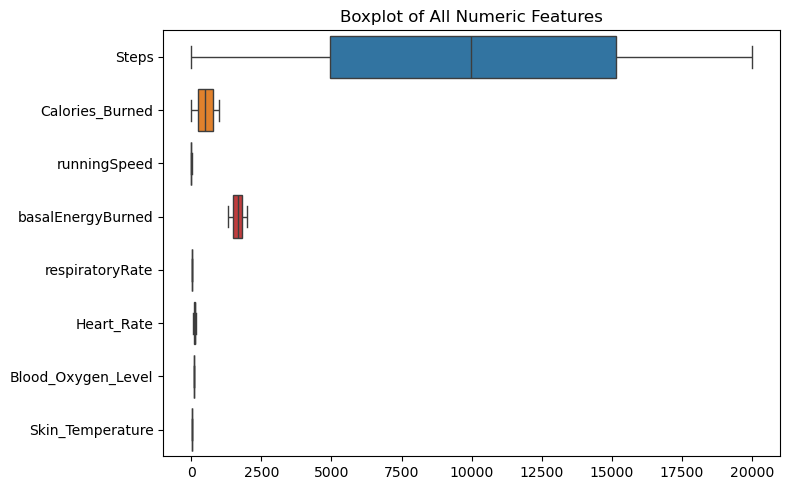

In [47]:
numeric_cols = data2.select_dtypes(include='number').columns

plt.figure(figsize=(8,5)) 
sns.boxplot(data=data2[numeric_cols], orient='h')   # 가로박스, 변수는 세로로
plt.title('Boxplot of All Numeric Features')
plt.tight_layout()
plt.show()

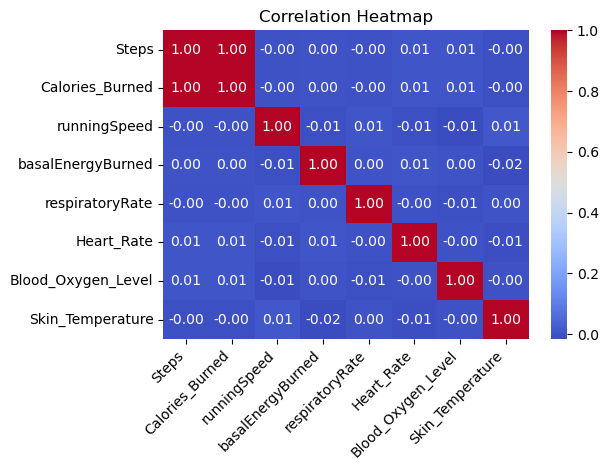

In [39]:
# numeric_data는 데이터프레임에서 숫자형 데이터만 추출한 것입니다.
numeric_data = data2.select_dtypes(include='number')
corr = numeric_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            xticklabels=corr.columns, yticklabels=corr.columns)

# 변수명 로테이션 45도
plt.xticks(rotation=45, ha='right')  # x축 변수명 45도 회전
plt.yticks(rotation=0)  # y축 변수명은 기본 설정

# 제목 설정
plt.title('Correlation Heatmap')

# 표시
plt.tight_layout()  # 레이블이 겹치지 않도록 레이아웃 조정
plt.show()

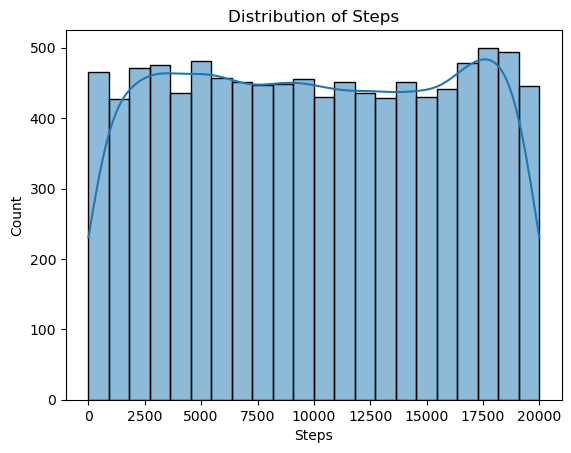

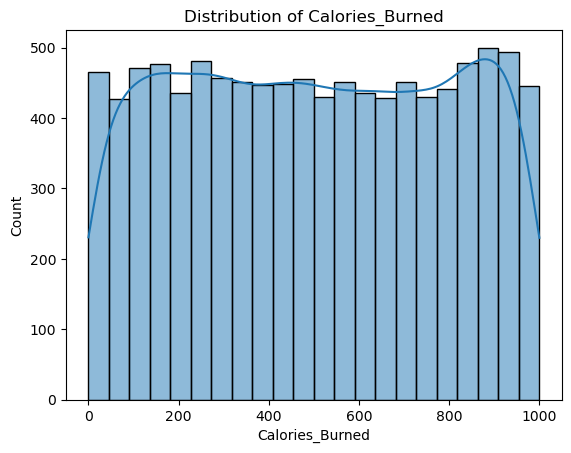

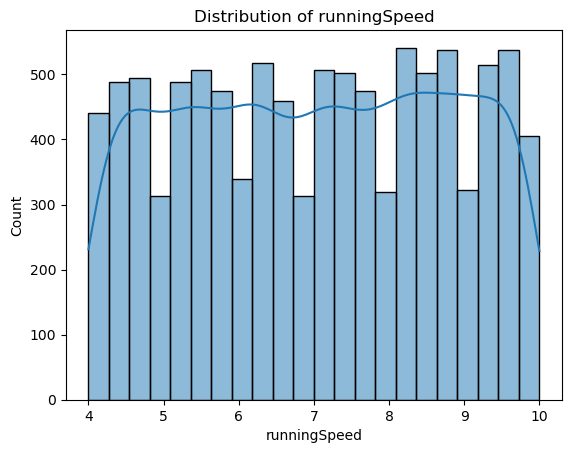

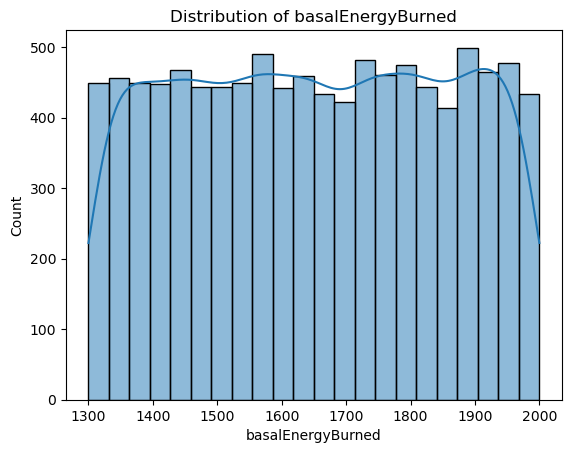

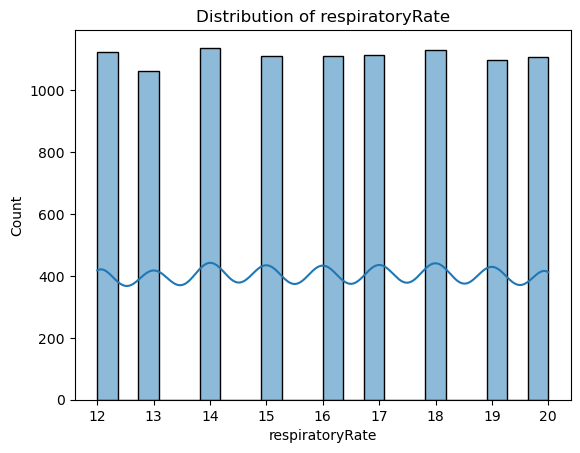

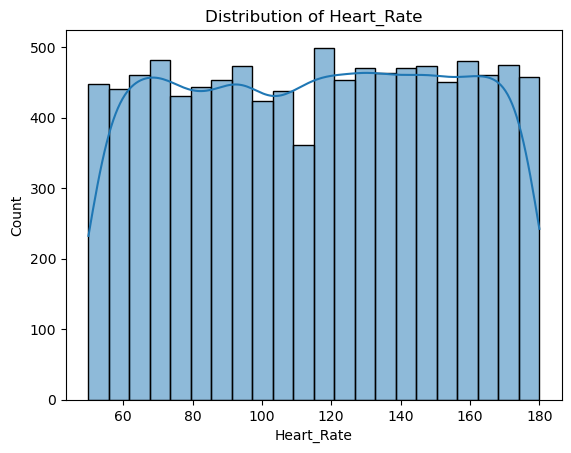

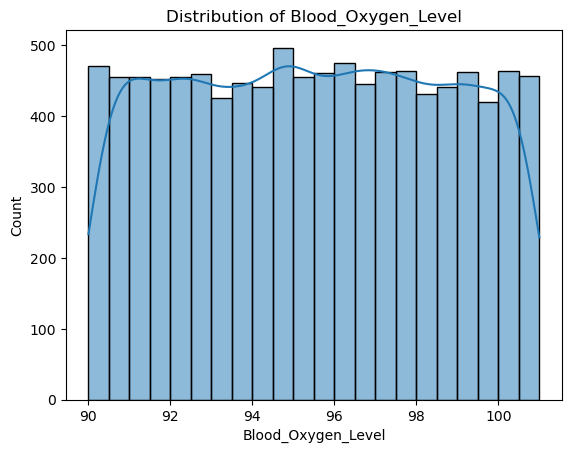

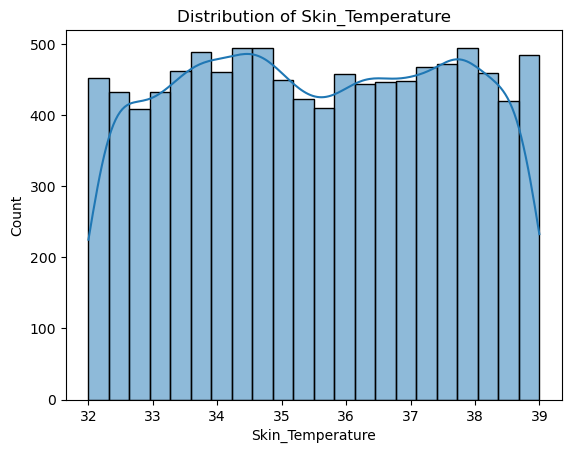

In [47]:
for col in numeric_cols:
    sns.histplot(data2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [69]:
cols = ['Steps', 'Calories_Burned', 'runningSpeed', 'basalEnergyBurned', 'respiratoryRate','Heart_Rate', 'Blood_Oxygen_Level', 'Skin_Temperature']
X = data2[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [73]:
kmeans = KMeans(n_clusters=3, random_state=42)
data2['cluster'] = kmeans.fit_predict(X_scaled)

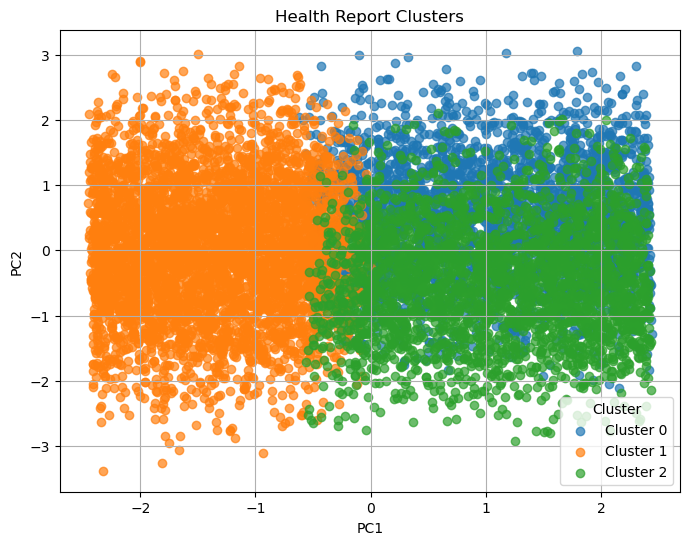

In [75]:
plt.figure(figsize=(8, 6))

for cluster_id in sorted(data2['cluster'].unique()):
    cluster_points = X_pca[data2['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Health Report Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [79]:
cols = ['Steps', 'Calories_Burned', 'Heart_Rate', 'Blood_Oxygen_Level', 'Skin_Temperature']
X = data1[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [105]:
kmeans = KMeans(n_clusters=3, random_state=42)
data1['cluster'] = kmeans.fit_predict(X_scaled)

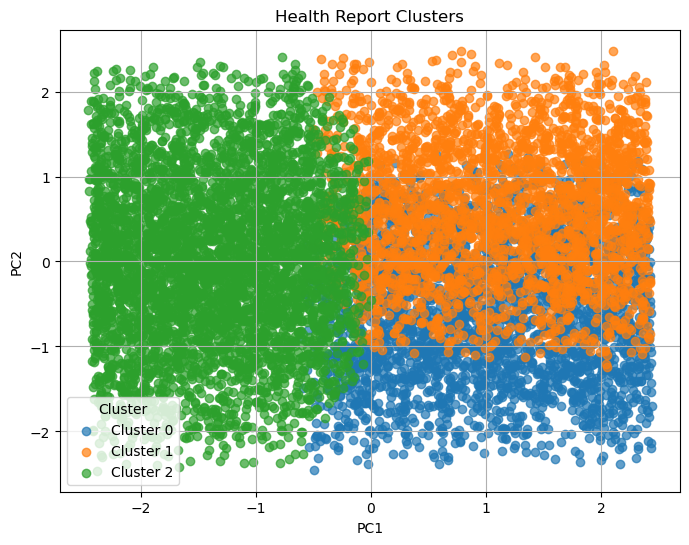

In [107]:
plt.figure(figsize=(8, 6))

for cluster_id in sorted(data1['cluster'].unique()):
    cluster_points = X_pca[data1['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Health Report Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

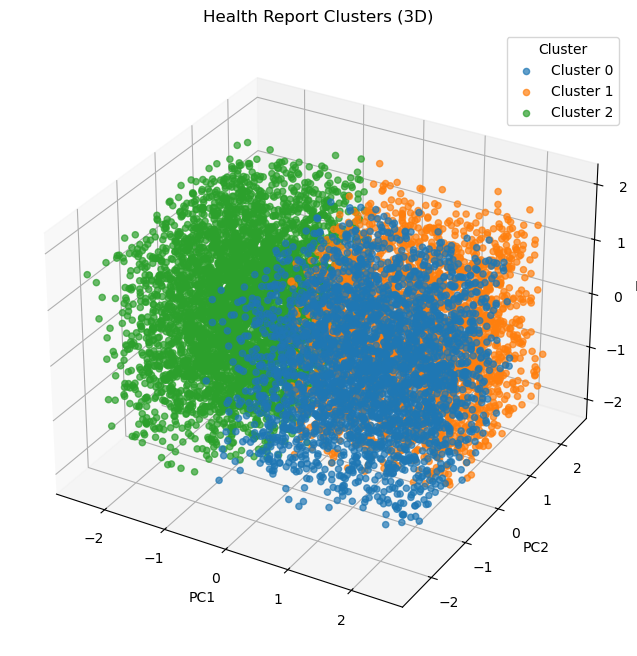

In [97]:
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in sorted(data1['cluster'].unique()):
    cluster_points = X_pca[data1['cluster'] == cluster_id]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster_id}', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Health Report Clusters (3D)')
ax.legend(title='Cluster')
plt.show()


In [87]:
print(pca.explained_variance_ratio_)

[0.40003309 0.20193193]


In [33]:
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=['PC1', 'PC2'],
    index=cols
)

print(loadings)

                         PC1       PC2
Steps               0.707048  0.007397
Calories_Burned     0.707048  0.007397
Heart_Rate          0.007969 -0.703874
Blood_Oxygen_Level  0.007837 -0.035729
Skin_Temperature   -0.006445  0.709348


In [115]:
joblib.dump(pca, r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\training\pretrained_models\pca_model.pkl")
joblib.dump(kmeans, r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\training\pretrained_models\kmeans_model.pkl")
joblib.dump(scaler, r"C:\Users\이수진\GitHub\SERVER_WAYVI\ai-server\training\pretrained_models\'health_scaler.pkl")

["C:\\Users\\이수진\\GitHub\\SERVER_WAYVI\\ai-server\\training\\pretrained_models\\'health_scaler.pkl"]